In [1]:
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from random import randint


In [2]:
import urllib.request

url = "http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz"
urllib.request.urlretrieve(url, "ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz")

('ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz',
 <http.client.HTTPMessage at 0x1f10fbda1d0>)

In [3]:
import tarfile

file_name = "ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz"
with tarfile.open(file_name, "r:gz") as tar:
    tar.extractall()

model_path = "ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model"
model = tf.saved_model.load(model_path)


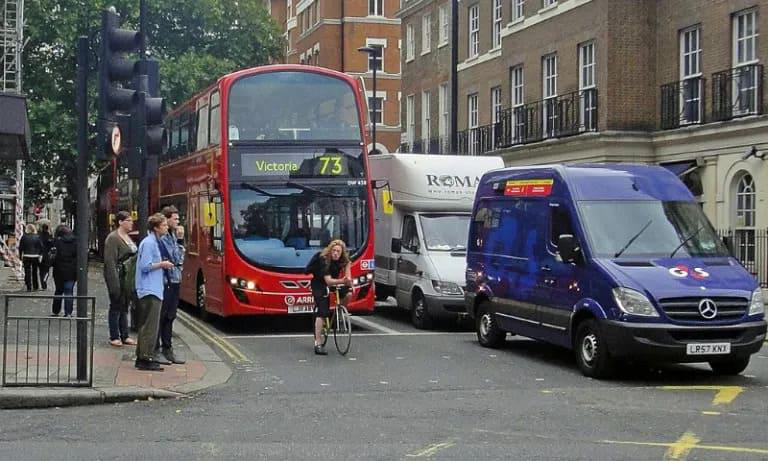

In [15]:
image = Image.open(r'detect(1).jpg')
image_np = np.array(image)
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.uint8)
image

In [16]:
detection = model(input_tensor)

# Parse the detection results
boxes = detection['detection_boxes'].numpy()
classes = detection['detection_classes'].numpy().astype(int)
scores = detection['detection_scores'].numpy()


In [17]:
labels = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
		'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 
		'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 
		'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 
		'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
		'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
		'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 
		'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse',
		'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
		'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

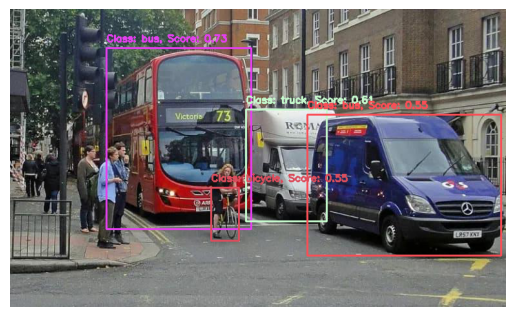

In [18]:
for i in range(classes.shape[1]):
	class_id = int(classes[0, i])
	score = scores[0, i]

	if np.any(score > 0.5): # Filter out low-confidence detections
		h, w, _ = image_np.shape
		ymin, xmin, ymax, xmax = boxes[0, i]

		# Convert normalized coordinates to image coordinates
		xmin = int(xmin * w)
		xmax = int(xmax * w)
		ymin = int(ymin * h)
		ymax = int(ymax * h)

		# Get the class name from the labels list
		class_name = labels[class_id]

		random_color = (randint(0, 256), randint(0, 256), randint(0, 256))

		# Draw bounding box and label on the image
		cv2.rectangle(image_np, (xmin, ymin), (xmax, ymax), random_color, 2)
		label = f"Class: {class_name}, Score: {score:.2f}"
		cv2.putText(image_np, label, (xmin, ymin - 10),
					cv2.FONT_HERSHEY_SIMPLEX, 0.5, random_color, 2)

# Display the result
plt.imshow(image_np)
plt.axis('off')
plt.show()
